In [1]:
import numpy as np
from matplotlib import pyplot as plt
import json, os
from helper_functions import pixelate

In [2]:
run = 3
Gamma0 = 5.00
rhoseed = 2.0 #0.9#0.16
Pii     = 0.1

lp = 1
lq = 0.1
ld = 2
lc = 5

pdir = '../../data/model_Q_v_rho/gamma0_{:1.1f}_rhoseed_{}_pi_{:1.1f}/lp_{:1.2f}_lq_{:1.2f}_ld_{:1.2f}_lc_{:1.2f}/run_{:d}/'.format(Gamma0, rhoseed, Pii, lp, lq, ld, lc, run)

datadir = pdir+'data/'

with open(pdir+'parameters.json') as jsonFile:
    parameters = json.load(jsonFile)

T         = parameters["T"]        # final time
dt_dump   = parameters["dt_dump"]
n_steps   = int(parameters["n_steps"])  # number of time steps
n_dump = int(T/dt_dump); dn_dump = int(n_steps/n_dump)
K         = parameters["K"]        # elastic constant, sets diffusion lengthscale of S with Gamma0
lambd     = parameters["lambda"]
p0bygamma = parameters["p0bygamma"]       # pressure when cells are close packed, should be very high
r_p       = parameters["r_p"]      # rate of pressure growth equal to rate of growth of cells
rho_in    = parameters["rho_in"]   # isotropic to nematic transition density, or "onset of order in the paper"
rhoisoend = parameters["rhoisoend"] /rho_in   # jamming density
rhonemend = parameters["rhonemend"] /rho_in   # jamming density max for nematic substrate
mx        = np.int32(parameters["mx"])
my        = np.int32(parameters["my"])
dx        = np.float32(parameters["dx"])
dy        = np.float32(parameters["dy"])
#setup a meshgrid
tol = 0.001

x   = np.linspace(0+tol, 1-tol, mx)
y   = np.linspace(0+tol, 1-tol, my)
xv, yv  = np.meshgrid(x,y)


times = np.arange(0, n_dump, 1)*dt_dump

1.3578013033396235 0.9967107168765116
1.2073640257223424


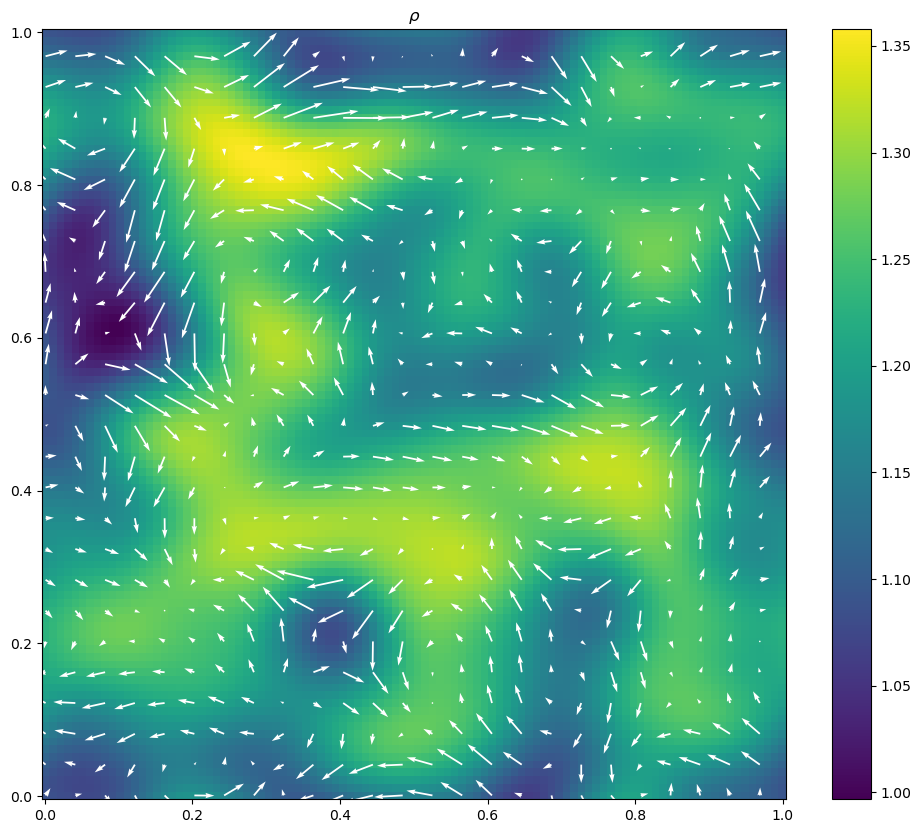

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig, ax=plt.subplots(figsize=(12,10))
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)
n=200

field = np.loadtxt(datadir+'rho.csv.{:d}'.format(n), delimiter=',')
vx = np.loadtxt(datadir+'vx.csv.{:d}'.format(n), delimiter=',')
vy = np.loadtxt(datadir+'vy.csv.{:d}'.format(n), delimiter=',')
p_factor = 4
vx = pixelate(vx, p_factor)
vy = pixelate(vy, p_factor)

fmax = np.max(field); fmin=np.min(field); print(fmax, fmin)
print(np.average(field))
#ctrf = [ax.pcolormesh(xv, yv, S_sqrd[i], cmap=cmap1, vmin=0, vmax=Smax), ax.quiver(xv,yv,nx[i],ny[i], color='w')]
ctrf = [ax.pcolormesh(xv, yv, field, vmin=fmin, vmax=fmax), ax.quiver(xv[::p_factor, ::p_factor], yv[::p_factor, ::p_factor], vx[::p_factor, ::p_factor], vy[::p_factor, ::p_factor], color='w')]
plt.colorbar(ctrf[0])
plt.title(r"$\rho$")
plt.show()

0.7812758895679986


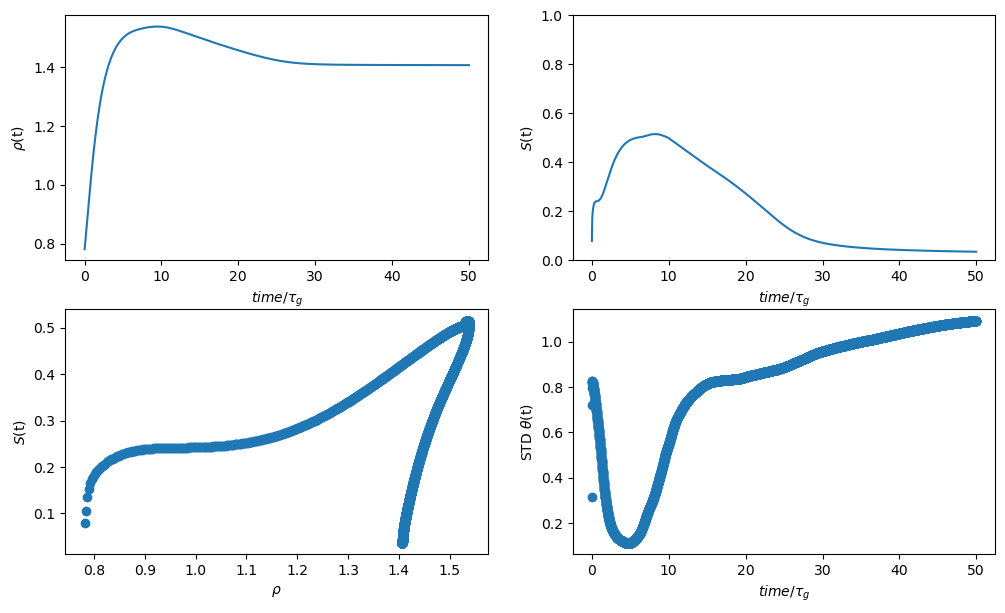

In [153]:
Rho = np.loadtxt(pdir+'/processed_data/meanrho.csv', delimiter=',')
print(Rho[0])
Ssum= np.loadtxt(pdir+'/processed_data/meanS.csv', delimiter=',')
stdtheta = np.loadtxt(pdir+'/processed_data/stdtheta.csv', delimiter=',')
meantheta = np.loadtxt(pdir+'/processed_data/meantheta.csv', delimiter=',')
fig, ax = plt.subplots(figsize=(12,7), ncols=2, nrows=2)
ax[0,0].plot(times, Rho); ax[0,0].set_xlabel(r'$time/\tau_g$'); ax[0,0].set_ylabel(r'$\rho$(t)');
ax[0,1].plot(times, Ssum); ax[0,1].set_xlabel(r'$time/\tau_g$'); ax[0,1].set_ylabel(r'$S$(t)');
ax[0,1].set_ylim(0,1);
ax[1,0].scatter(Rho, Ssum); ax[1,0].set_xlabel(r'$\rho$'); ax[1,0].set_ylabel(r'$S$(t)');
ax[1,1].scatter(times, stdtheta); ax[1,1].set_xlabel(r'$time/\tau_g$'); ax[1,1].set_ylabel(r'STD $\theta$(t)');

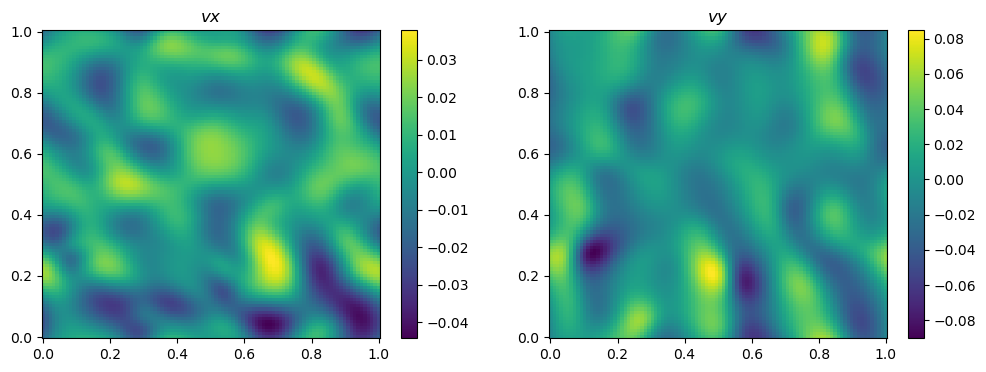

In [128]:
n=400
vx = np.loadtxt(datadir+'vx.csv.{:d}'.format(n), delimiter=',')
vy = np.loadtxt(datadir+'vy.csv.{:d}'.format(n), delimiter=',')

fig, ax=plt.subplots(figsize=(12,4),ncols=2)
plot1 = [ax[0].pcolormesh(xv, yv, vx, cmap='viridis', vmin=np.min(vx), vmax=np.max(vx))]
plot2 = [ax[1].pcolormesh(xv, yv, vy, cmap='viridis', vmin=np.min(vy), vmax=np.max(vy))]

fig.colorbar(plot1[0], ax=ax[0])
fig.colorbar(plot2[0], ax=ax[1])
ax[0].set_title(r"$ vx $")
ax[1].set_title(r"$ vy $")
plt.show()

0.6604861669262131 0.1186133004967195


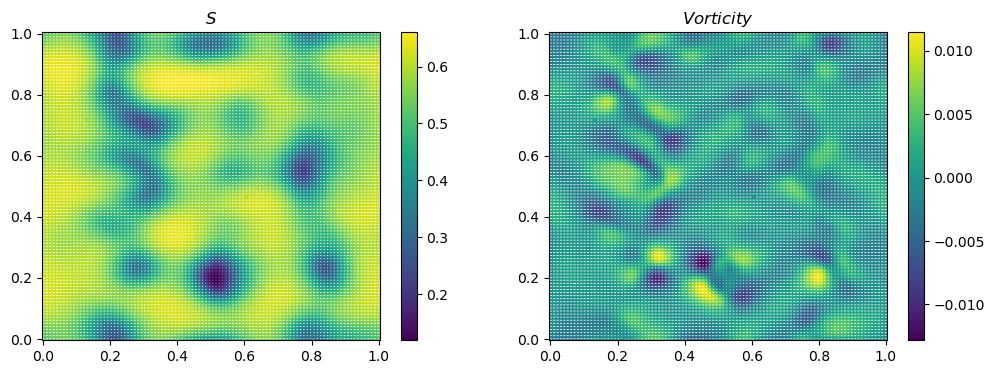

In [4]:
fig, ax=plt.subplots(figsize=(12,4),ncols=2)
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

n=420


Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
curldivQ = np.loadtxt(datadir+'curldivQ.csv.{:d}'.format(n), delimiter=',')
S = np.sqrt(Qxx**2+Qxy**2)
p_factor = 4
theta = np.arctan2(Qxy, Qxx)/2
Snx    = S*np.cos(theta)
Sny    = S*np.sin(theta)
print(np.max(S), np.min(S))

plot1 = [ax[0].pcolormesh(xv, yv, S, cmap='viridis', vmin=np.min(S), vmax=np.max(S)), ax[0].quiver(xv,yv,Snx,Sny, color='w', pivot='middle', headlength=0, headaxislength=0)]
plot2 = [ax[1].pcolormesh(xv, yv, curldivQ, cmap='viridis', vmin=np.min(curldivQ), vmax=np.max(curldivQ)), ax[1].quiver(xv,yv,Snx,Sny, color='w', pivot='middle', headlength=0, headaxislength=0)]

fig.colorbar(plot1[0], ax=ax[0])
fig.colorbar(plot2[0], ax=ax[1])
ax[0].set_title(r"$ S $")
ax[1].set_title(r"$ Vorticity $")
plt.show()

0.49065409311016683 -0.5296007991793324
8.388828045990932
0.7852099779784284


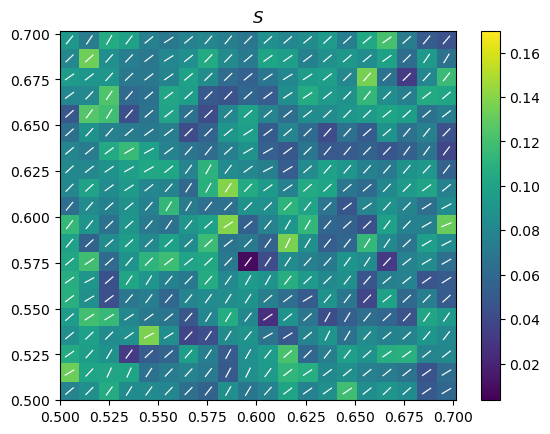

In [10]:
fig, ax=plt.subplots()
#colors = ['#c1272d', '#eecc16','#008176','#0000a7']
#cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

n=0

charge = np.loadtxt(datadir+'curldivQ.csv.{:d}'.format(n), delimiter=',')
Qxx = np.loadtxt(datadir+'Qxx.csv.{:d}'.format(n), delimiter=',')
Qxy = np.loadtxt(datadir+'Qxy.csv.{:d}'.format(n), delimiter=',')
S = np.sqrt(Qxx**2+Qxy**2)
theta = np.arctan2(Qxy, Qxx)/2
nx    = np.cos(theta)
ny    = np.sin(theta)

print(np.max(charge), np.min(charge))

p_factor = 1
pcharge = pixelate(2*charge/S, p_factor)
print(np.max(pcharge))
p_half_defects = np.where((pcharge)>0.2)
m_half_defects = np.where((-pcharge)>0.2)
#print(p_half_defects, m_half_defects)

pnx = np.cos(pixelate(theta, p_factor))
pny = np.sin(pixelate(theta, p_factor))
print(np.mean(theta))

ix, fx, iy, fy = 50, 70, 50, 70
ctrf = [ax.pcolormesh(xv[ix:fx, iy:fy], yv[ix:fx, iy:fy], (S)[ix:fx, iy:fy], cmap='viridis', vmin=np.min(S), vmax=np.max(S))]
ax.quiver(xv[ix:fx:p_factor, iy:fy:p_factor],yv[ix:fx:p_factor, iy:fy:p_factor], pnx[ix:fx:p_factor, iy:fy:p_factor], pny[ix:fx:p_factor, iy:fy:p_factor], color='w', pivot='middle', headlength=0, headaxislength=0)
#ax.scatter(p_half_defects[1]/mx, p_half_defects[0]/my, color='pink')
#ax.scatter(m_half_defects[1]/mx, m_half_defects[0]/my, color='red')
#ctrf = [ax.pcolormesh(xv, yv, rho[i], cmap=cmap1, vmin=np.min(rho), vmax=np.max(rho)), ax.quiver(xv,yv,nx[i],ny[i], color='w', headlength=0, headaxislength=0, width=0.006, pivot='middle')]
#ctrf = [ax.pcolormesh(xv, yv, rho[i]*v[i,:,:,1])]
plt.colorbar(ctrf[0])
plt.title(r"$ S $")
plt.show()